In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Gravity_Acc=9.81 #gravity accleration
DataX=[]
DataY=[]
Pairs=np.array([("Angle","Velocity")])

In [3]:
Barrier=[50,75,300]
Landing_Zone=[150,200,0]
VelocityRange=[20,100,1]
AngleRange=[0,90,1]

It is definition of lines that will draw the Barrier

In [4]:
Line1X=np.full(Barrier[2],Barrier[0])
Line1Y=np.arange(0,Barrier[2],1)
Line2X=np.arange(Barrier[0],Barrier[1],1)
Line2Y=np.full(Barrier[1]-Barrier[0],Barrier[2])
Line3X=np.full(Barrier[2],Barrier[1])
Line3Y=np.arange(0,Barrier[2],1)

In [5]:
# Calculation of X coordinate of Value
def X_coordinate (Value):
    return Value*math.cos(math.radians(Angle))

# Calculation of Y coordinate of Value
def Y_coordinate (Value):
    return Value*math.sin(math.radians(Angle))

def TrajectoryPointX (V,T):
    return X_coordinate(V)*T

def TrajectoryPointY (V,T):
    return Y_coordinate(V)*T-0.5*Gravity_Acc*T*T

Tři vnořené for-loopy. V prvním měním Velocity, v druhém Angle a ve třetím Time. V tomto třetím for-loopu se počítá trajektorie pro danou kombinaci Velocity a Angle a zároveň se uvěřuje, jestli trajektorie naráží do Bariery a nebo dopadá do Landing Zone. Podle toho se nastavují proměnné BarrierCheck a LandingCheck, které se v závěru vyhodnocují. Vyhovují-li podmínkám (trajektorie neprochází Barrierou a dopadá do Landing Zone) tak se kombinace Velocity a Anglu (jmenuje se Pair) uloží do pole všech vyhovující párů a celá trajektoriem se přidá do listu DataX resp. DataY pro vytisknutí.

In [6]:
for Velocity in np.arange(VelocityRange[0],VelocityRange[1],VelocityRange[2]):    
    for Angle in np.arange(AngleRange[0],AngleRange[1],AngleRange[2]):
        BarrierCheck=False
        LandingCheck=False
        TmpX=[]
        TmpY=[]
        for Time in np.arange(0,50,0.1):
            x=TrajectoryPointX(Velocity,Time)
            y=TrajectoryPointY(Velocity,Time)
           # Barrier criterium
            if ((x > Barrier[0] and y < Barrier[2]) and (x < Barrier[1] and y < Barrier[2])):
                BarrierCheck=True
                break
            # Landing Zone criterium    
            if ((x > Landing_Zone[0] and y < 0) and (x < Landing_Zone[1] and y < 0)):
                LandingCheck=True
                break
            # Bellow y axis criterium
            if y < 0:
                break   
            TmpX.append(x)
            TmpY.append(y)

        # Conditions: do not hit the Barrier and hit the Landing Zone
        if not BarrierCheck:
            if LandingCheck:
                Pairs=np.append(Pairs,[[Angle,Velocity]],axis=0)
                DataX=DataX+TmpX
                DataY=DataY+TmpY         

In [7]:
print(Pairs)

[['Angle' 'Velocity']
 ['84' '84']
 ['84' '85']
 ['84' '86']
 ['83' '87']
 ['84' '87']
 ['83' '88']
 ['84' '88']
 ['83' '89']
 ['84' '89']
 ['84' '90']
 ['84' '91']
 ['84' '92']
 ['84' '93']
 ['85' '93']
 ['84' '94']
 ['85' '94']
 ['84' '95']
 ['85' '95']
 ['84' '96']
 ['85' '96']
 ['84' '97']
 ['85' '97']
 ['85' '98']
 ['85' '99']]


<function matplotlib.pyplot.show(*args, **kw)>

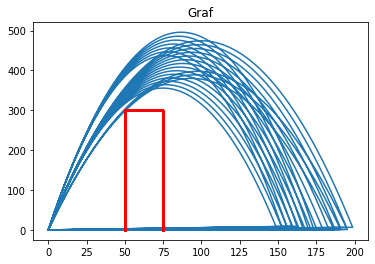

In [8]:
plt.title('Graf')
plt.plot(DataX, DataY)
plt.plot(Line1X,Line1Y,color='red',linewidth=3)
plt.plot(Line2X,Line2Y,color='red',linewidth=3)
plt.plot(Line3X,Line3Y,color='red',linewidth=3)
plt.show